**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the Dataset**

In [ ]:
dataset = pd.read_csv('winequality-red.csv')

**Checking the Total Rows and Columns**

In [ ]:
dataset.shape

(1599, 12)

**Cheking First Five Values in Dataset**

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Checking For Missing Values**

In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Visualizing Each Quality**

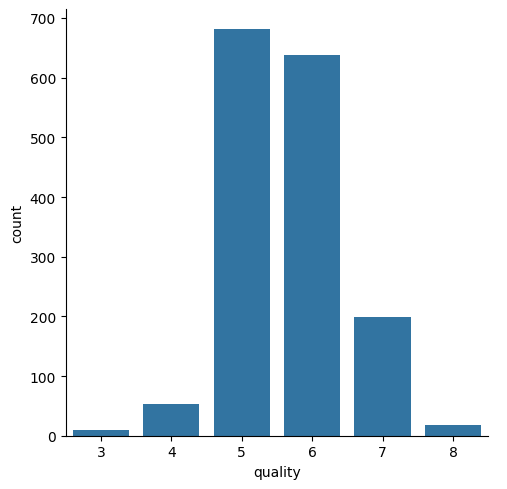

In [ ]:
sns.catplot(x='quality', data = dataset, kind = 'count')

**Finding Correlations**

<Axes: >

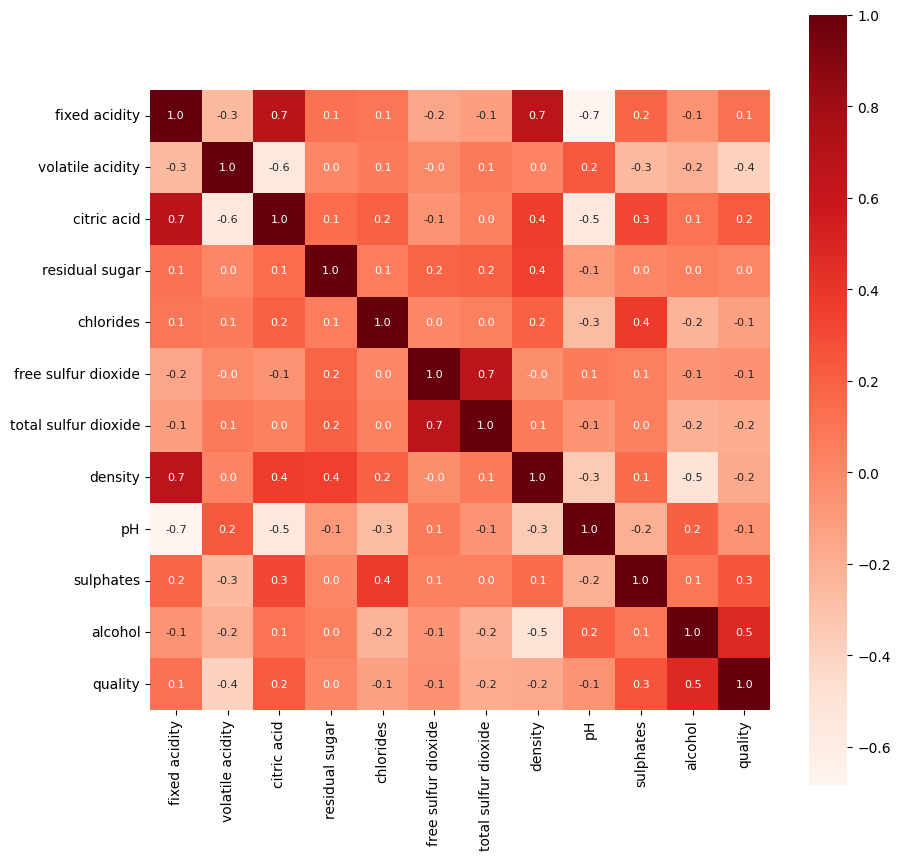

In [ ]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

**Data Preprocessing**

In [ ]:
X = dataset.drop('quality', axis=1)

**Label Binarisation**

In [ ]:
Y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

**Model Training: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
new_model = RandomForestClassifier(**best_params)
new_model.fit(X_train, Y_train)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=30, n_estimators=50)

**Prediction Test Set Results**

In [ ]:
Y_pred = new_model.predict(X_test)
Y_test_reshaped = Y_test.values.reshape(-1, 1)
Y_pred_reshaped = Y_pred.reshape(-1, 1)
result = np.concatenate((Y_pred_reshaped, Y_test_reshaped), axis=1)
print(result.T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

**Visualisation of Training Set**

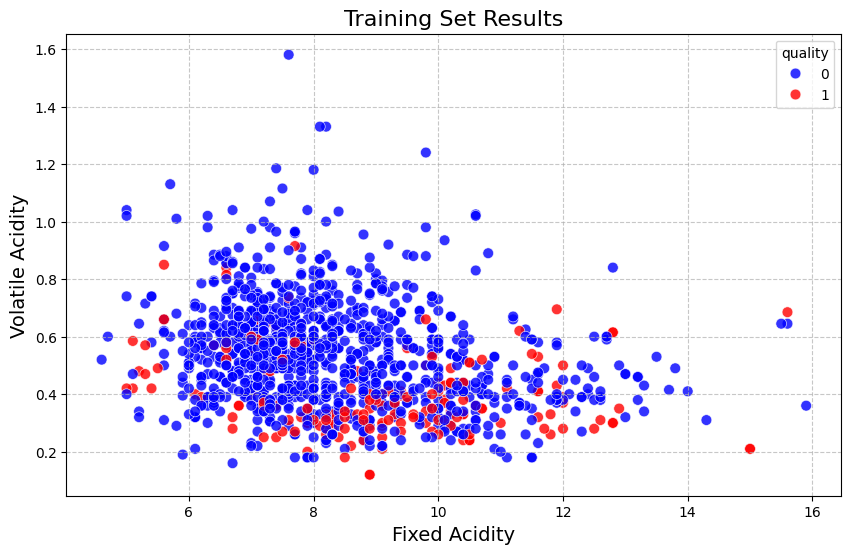

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
scatter = sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=Y_train, palette=colors, s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title('Training Set Results', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Volatile Acidity', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Visualisation of Test Set**

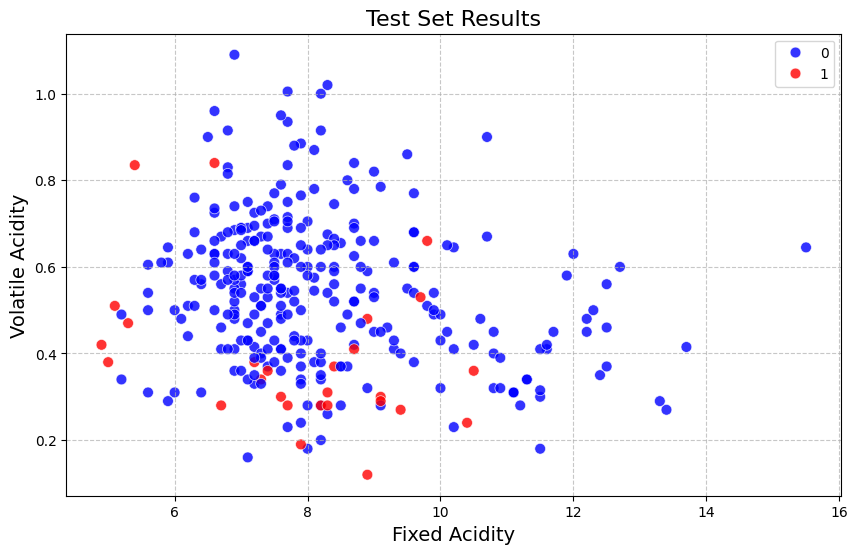

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
scatter = sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=Y_pred, palette=colors, s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title('Test Set Results', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Volatile Acidity', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)
test_data_accuracy = accuracy_score(Y_pred, Y_test)
print('Accuracy: ', test_data_accuracy)

[[277  16]
 [  6  21]]
Accuracy:  0.93125
